In [135]:
# Import modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib notebook

In [136]:
# Load data and clean up the Age table
data = pd.read_excel("Data_Complete.xlsx", sheetname=None)
for df in data.values():
    df.sort_values(by=["Age"], inplace=True)
    df.set_index("Age", inplace=True)
    

<IPython.core.display.Javascript object>


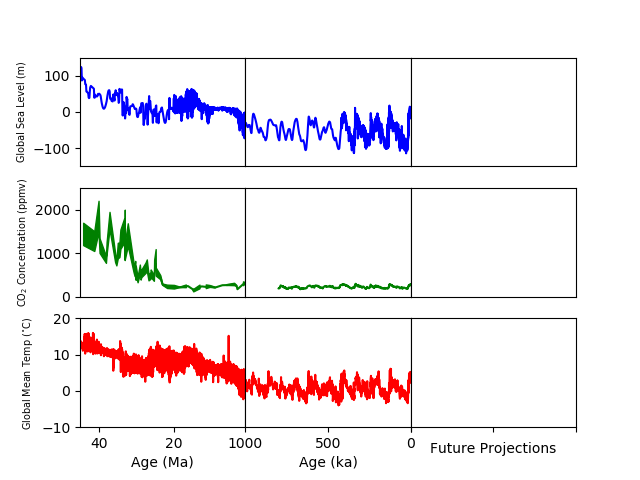

In [197]:
# Make the plot skeleton
f, axs = plt.subplots(3, 3)

In [202]:
# Plot all the data
ax1 = data["Sealevel Deep Time"]["Sealevel"].plot(ax=axs[0,0], color="blue")
ax2 = data["Sealevel Orbital"]["Sealevel"].plot(ax=axs[0,1], color="blue")
ax3 = "Projections Sealevel"

ax4 = data["CO2 Deep Time"]["CO2"].plot(ax=axs[1,0], color="green")
ax4.fill_between(data["CO2 Deep Time"].index, 
                data["CO2 Deep Time"]["CO2Max"],
                data["CO2 Deep Time"]["CO2Min"], color="green")
ax5 = data["CO2 Orbital"]["CO2"].plot(ax=axs[1,1], color="green")
ax6 = "Projections CO2"

ax7 = data["Temperature Deep Time"]["Temperature"].plot(ax=axs[2, 0], color="red")
ax8 = data["Temperature Orbital"]["Temperature"].plot(ax=axs[2, 1], color="red")
ax9 = "Projections Temperature"

In [203]:
# Set common limits:
[ax.set_xlim(1, 45) for ax in axs[:, 0]]
[ax.set_xlim(0, 1000000) for ax in axs[:, 1]]

[ax.set_ylim(-150, 150) for ax in axs[0, :]]
[ax.set_ylim(0, 2500) for ax in axs[1, :]]
[ax.yaxis.set_units("log") for ax in axs[1, :]]
[ax.set_ylim(-10, 20) for ax in axs[2, :]];

In [204]:
# Make sure all the time axes go the other way around
[ax.invert_xaxis() for ax in axs.flatten()];

In [205]:
# Turn off spines in axes which don't need them:
for ax in axs[(0,1),:].flatten():
    ax.set_xlabel("")
    ax.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off') # labels along the bottom edge are off

for ax in axs[:, (1,2)].flatten():
    ax.set_ylabel("")
    ax.tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        right='off',         # ticks along the top edge are off
        labelleft='off') # labels along the bottom edge are off

In [206]:
# Move the plots closer together:
f.subplots_adjust(wspace=0.0)

In [207]:
# Set xtick and xaxis labels
ax7.set_xticklabels(["0", "20", "40"])
ax7.set_xlabel("Age (Ma)")
ax8.set_xticklabels(["0", "500", "1000"])
ax8.set_xlabel("Age (ka)")
axs[-1, -1].set_xticklabels(["", "", ""])
axs[-1, -1].set_xlabel("Future Projections");

Text(0.5,23.5222,'Future Projections')

In [208]:
# Set ylabels
ax1.set_ylabel("Global Sea Level (m)", size="x-small")
ax4.set_ylabel("CO$_{2}$ Concentration (ppmv)", size="x-small")
ax7.set_ylabel("Global Mean Temp ($^{\circ}$C)", size="x-small");

Text(35.4722,0.5,'Global Mean Temp ($^{\\circ}$C)')